# Portfolio Methodolgy

1. DGI - Rebalance every 6 months picking around 10 - 30 names from CA and US universe
    - Add names slowly, 2-3 names a month
    - **GTC Stop Limit of 5% on each name**
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: MU AMD MSFT TTWO
    - AMD Earnings: Oct 22
    - MSFT Earnings: Oct 24
    - TTWO Earnings: Nov 5
    - MU Earnings: Dec 17
        - **Exit Criteria: When the call option drops below 60 delta**
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
    - **Short ATM SPX Put spreads around 25 points wide**
        - **Long bi-weekly unit puts, around -7% or so of SPX spot (or something with a cost of 15% of the credit)**
        - **The SPX put spread will have a capped max loss of 2,500 per contract, while in low volatility, the bi-weekly units are severely underpriced and will explode 10X to 20X in value if the long strike in the spread gets tested. Vega and Gamma play a huge factor in the repricing of these units.**
        - Initiate the units every 2 weeks letting them run to expiry
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|VAA/PAA|25%|11/01/2018|12/01/2018|12/01/2018|
|LEAPs|5%|11/01/2018|12/01/2018|01/01/2019|
|Short Vol|2%|NA|NA|NA|
|Barbell Hedging|1.5%|10/22/2018|10/24/2018|10/29/2018|
|Treasuries|60%|11/01/2018|11/29/2018|12/01/2018|

## Key Modules to Run

- fundamental_data_collect.py to run monthly to collected latest financial statements and key stats from yahoo
- finstatement_cleaning.py to run right after fundamental_data_collect.py to create cleaned data for earnings plays



In [1]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *
from reuters_query import reuters_query

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *
from lookup_earnings import lookup_earnings

os.chdir(main_dir)

# Allocate Smartly Checking

In [2]:
# Short Call Assignment Price - 287.5

portfolio_value =  300000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

Allocation    price  Market Value  Holdings
symbol                                             
DBC          0.014   16.880        4200.0     249.0
HYG          0.014   84.255        4200.0      50.0
IEF          0.417  100.175      125100.0    1249.0
IWM          0.014  152.935        4200.0      27.0
LQD          0.500  111.975      150000.0    1340.0
QQQ          0.014  167.665        4200.0      25.0
SPY          0.014  271.790        4200.0      15.0
VNQ          0.014   78.875        4200.0      53.0

## Checking market correlations

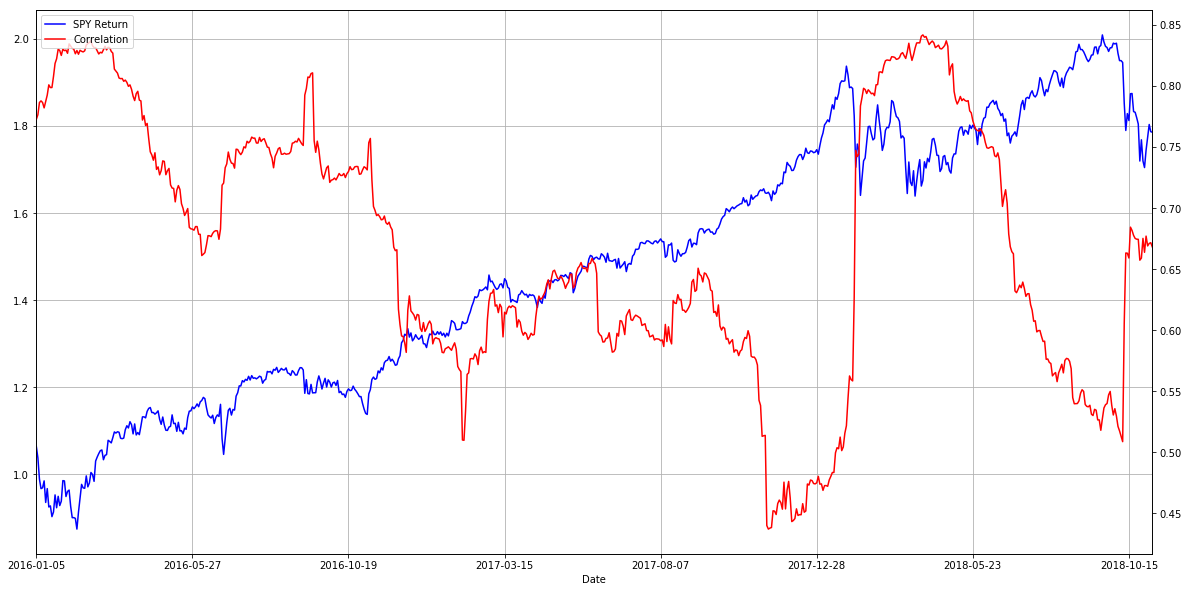

                XLRE       XLV       XLI       XLK       XLE       XLU  \
2018-10-30  0.432195  0.915944  0.850794  0.915956  0.729119  0.019087   
2018-10-31  0.395356  0.908453  0.852474  0.916932  0.729650 -0.006917   
2018-11-01  0.399878  0.910993  0.856426  0.917836  0.734797 -0.016608   
2018-11-02  0.404528  0.911463  0.855520  0.914758  0.735113 -0.010320   
2018-11-05  0.394213  0.908860  0.854410  0.910291  0.741053 -0.014919   

                 XLB       XLP       XLF       XLY  Avg_Corr   SPY_cum  
2018-10-30  0.753220  0.441545  0.808454  0.904015  0.677033  1.744600  
2018-10-31  0.759625  0.415250  0.813259  0.906124  0.669021  1.773914  
2018-11-01  0.759765  0.427726  0.812704  0.907035  0.671055  1.803434  
2018-11-02  0.761571  0.431493  0.811104  0.901108  0.671634  1.786829  
2018-11-05  0.759688  0.427110  0.804210  0.896806  0.668172  1.785804  


In [3]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [4]:
((sector_df.dropna() + 1).cumprod()-1).tail()

SPY      XLRE       XLV       XLI       XLK       XLC  \
2018-10-30 -0.028058  0.032698  0.043837 -0.052984 -0.052359 -0.097078   
2018-10-31 -0.017677  0.018730  0.045251 -0.045746 -0.029819 -0.078463   
2018-11-01 -0.007223  0.022540  0.058449 -0.028950 -0.018480 -0.073058   
2018-11-02 -0.013103  0.013968  0.051850 -0.030589 -0.037659 -0.082466   
2018-11-05 -0.013466  0.026667  0.057742 -0.031681 -0.048439 -0.089071   

                 XLE       XLU       XLB       XLP       XLF       XLY  
2018-10-30 -0.106904  0.082487 -0.112669  0.087544 -0.052285 -0.069243  
2018-10-31 -0.101418  0.069735 -0.100530  0.077360 -0.039122 -0.057255  
2018-11-01 -0.093792  0.064953 -0.075227  0.084998 -0.034735 -0.038021  
2018-11-02 -0.096066  0.058976 -0.077449  0.079318 -0.035466 -0.034085  
2018-11-05 -0.086165  0.067244 -0.081381  0.086173 -0.026464 -0.042315

## Earnings

**Key modules to run**
- new_earnings_setup.py for given date in string form 'yyyy-mm-dd': this gives the latest input data for earnings_prediction
- earnings_prediction.py for determining position to take on earnings name

In [2]:
date_lookup = '2018-11-06'

curr_earnings = date_earnings(date_lookup)
curr_earnings = curr_earnings[curr_earnings['Call Time'].isin(['After Market Close', 'Before Market Open'])]

In [6]:
acs = curr_earnings[curr_earnings['Call Time'] == 'After Market Close']
focus_names = acs.index.drop_duplicates().tolist()
acs

Call Time EPS Estimate  \
ADVM  After Market Close         -0.3   
APEI  After Market Close         0.31   
ASH   After Market Close         0.97   
AQST  After Market Close        -0.48   
KAR   After Market Close          0.7   
AJX   After Market Close         0.42   
ACAD  After Market Close        -0.58   
ACRS  After Market Close        -1.33   
ANDV  After Market Close          2.8   
PAA   After Market Close         0.36   
ATHX  After Market Close        -0.07   
AIZ   After Market Close         1.01   
JKHY  After Market Close         0.93   
ATRI  After Market Close            -   
PAHC  After Market Close         0.41   
LNT   After Market Close         0.84   
AMSC  After Market Close        -0.24   
KTOS  After Market Close         0.03   
BWXT  After Market Close         0.62   
RRGB  After Market Close         0.11   
IOVA  After Market Close        -0.33   
BEL   After Market Close         0.28   
BBSI  After Market Close         2.26   
CAPL  After Market Close         0.07   
DVN   After Market Close         0.41   
CTSO  After Market Close        -0.14   
TWO   After Market Close         0.47   
PUMP  After Market Close         0.54   
CPE   After Market Close          0.2   
QDEL  After Market Close         0.49   
...                  ...          ...   
NP    After Market Close         1.06   
TSLX  After Market Close         0.49   
VSM   After Market Close         0.57   
OTIC  After Market Close        -0.47   
PRI   After Market Close         1.86   
TWLO  After Market Close         0.02   
VKTX  After Market Close        -0.12   
TRUE  After Market Close         0.05   
SUPN  After Market Close         0.41   
MED   After Market Close         1.14   
OSTK  After Market Close         -0.8   
IOSP  After Market Close         1.06   
KRO   After Market Close         0.69   
IIPR  After Market Close          0.2   
MODN  After Market Close        -0.02   
PLT   After Market Close         0.72   
PLT   After Market Close         0.72   
SNES  After Market Close        -0.11   
MXWL  After Market Close        -0.18   
ZAGG  After Market Close         0.41   
NL    After Market Close         0.49   
DATA  After Market Close        -0.11   
VSLR  After Market Close         0.16   
XENE  After Market Close        -0.47   
NEWR  After Market Close         0.12   
IMI   After Market Close        -0.04   
MBI   After Market Close        -0.19   
JAZZ  After Market Close         3.32   
RLJ   After Market Close         0.21   
TPRE  After Market Close        -0.23   

                                           Name  
ADVM                Adverum Biotechnologies Inc  
APEI              American Public Education Inc  
ASH                 Ashland Global Holdings Inc  
AQST                 Aquestive Therapeutics Inc  
KAR                    KAR Auction Services Inc  
AJX                             Great Ajax Corp  
ACAD                 ACADIA Pharmaceuticals Inc  
ACRS                   Aclaris Therapeutics Inc  
ANDV                                   Andeavor  
PAA             Plains All American Pipeline LP  
ATHX                               Athersys Inc  
AIZ                                Assurant Inc  
JKHY            Jack Henry &amp; Associates Inc  
ATRI                                Atrion Corp  
PAHC                  Phibro Animal Health Corp  
LNT                         Alliant Energy Corp  
AMSC               American Superconductor Corp  
KTOS  Kratos Defense and Security Solutions Inc  
BWXT                       BWX Technologies Inc  
RRGB              Red Robin Gourmet Burgers Inc  
IOVA                Iovance Biotherapeutics Inc  
BEL                                 Belmond Ltd  
BBSI              Barrett Business Services Inc  
CAPL                   Crossamerica Partners LP  
DVN                           Devon Energy Corp  
CTSO                          Cytosorbents Corp  
TWO                 Two Harbors Investment Corp  
PUMP                      ProPetro Holding Corp  
CPE                   

In [7]:
start_time = time.time()

start_date = dt.datetime(2018,1,1)

earnings_data = lookup_earnings(focus_names, start_date)

print("--- %s seconds ---" % (time.time() - start_time))

0.79% Completed
1.57% Completed
No revenues for ASH
2.36% Completed
No performance_summary for AQST
No revenues for KAR
3.15% Completed
No revenues for AJX
3.94% Completed
4.72% Completed
5.51% Completed
No revenues for PAA
6.30% Completed
No revenues for ATHX
7.09% Completed
No revenues for AIZ
7.87% Completed
8.66% Completed
No analyst_recs for ATRI
No sales_surprises for ATRI
9.45% Completed
No revenues for LNT
10.24% Completed
11.02% Completed
11.81% Completed
12.60% Completed
13.39% Completed
No insiders_txns for IOVA
No revenues for BEL
No insiders_txns for BEL
14.17% Completed
14.96% Completed
No revenues for DVN
15.75% Completed
No revenues for CTSO
16.54% Completed
No revenues for TWO
17.32% Completed
18.11% Completed
No revenues for CPE
18.90% Completed
19.69% Completed
20.47% Completed
21.26% Completed
22.05% Completed
No performance_summary for FNHC
No revenues for GV
No estimates for GV
No recommendations for GV
No analyst_recs for GV
No sales_analysis for GV
No sales_surp

In [110]:
#################### Preliminary Name Selection ###################################
summary_df = earnings_data[1]
summary_df = summary_df[summary_df['Market Cap(Mil.)'] > 500].sort_values('Market Cap(Mil.)')

eps_df = earnings_data[0]
eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_df['NegativeSurprise'] = eps_df['surprisePercent'] < 0 
eps_df['PositiveSurprise'] = eps_df['surprisePercent'] > 0
eps_df['returnDifferentFromEPS'] = eps_df['surprisePercent']*eps_df['Stock_closeToOpen'] < 0
eps_df['LargeMoves'] = abs(eps_df['Stock_closeToOpen']) > 0.02

eps_corr = eps_df[['Underlying','NegativeSurprise',
                   'PositiveSurprise',
                   'returnDifferentFromEPS']].groupby('Underlying').sum()
eps_corr['surpriseReturnCorrelation'] = np.nan
corrs = []
for ticker in eps_corr.index:
    curr_corr = eps_df[eps_df['Underlying'] == ticker]
    corrs.append(curr_corr[['surprisePercent','Stock_closeToOpen']].corr().iloc[0,1])
eps_corr['surpriseReturnCorrelation'] = corrs
eps_corr['LargeMoves'] = eps_df[['Underlying','LargeMoves']].groupby('Underlying').sum()

selected_names = eps_corr[eps_corr['LargeMoves'] > 2].index.tolist()

#################### Filtering on Preliminary Name Selection ###################################
summary_df = summary_df[summary_df.index.isin(selected_names)]

eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_corr = eps_corr[eps_corr.index.isin(summary_df.index)]

scores_df = earnings_data[2]
scores_df = scores_df[scores_df.index.isin(summary_df.index)]
scores_df['TotalScore'] = scores_df.mean(axis = 1)
scores_df = scores_df.sort_values('TotalScore')

analyst_df = earnings_data[3]
analyst_df = analyst_df[analyst_df.index.isin(summary_df.index)]

valuations_df = earnings_data[4]
valuations_df = valuations_df[valuations_df.Underlying.isin(summary_df.index)]

growthrate_df = earnings_data[5]
growthrate_df = growthrate_df[growthrate_df.Underlying.isin(summary_df.index)]

profitability_df = earnings_data[6]
profitability_df = profitability_df[profitability_df.Underlying.isin(summary_df.index)]

finstrength_df = earnings_data[7]
finstrength_df = finstrength_df[finstrength_df.Underlying.isin(summary_df.index)]

perf_df = earnings_data[8]
perf_df = perf_df[perf_df.Underlying.isin(summary_df.index)]

rev_revisions_df = earnings_data[9]
rev_revisions_df = rev_revisions_df[rev_revisions_df.Underlying.isin(summary_df.index)]

earnings_revisions_df = earnings_data[10]
earnings_revisions_df = earnings_revisions_df[earnings_revisions_df.Underlying.isin(summary_df.index)]

insider_trades = earnings_data[11]
insider_trades = insider_trades[insider_trades.Underlying.isin(summary_df.index)]

growth_sums = earnings_data[12]
growth_sums = growth_sums[growth_sums.Underlying.isin(summary_df.index)]

In [111]:
scores_df.sort_values(['ValuationScore','TotalScore'])

FinStrengthScore  GrowthRateScore  PerfRankScore  ProfitScore  \
FIVN               0.0            42.86          89.29         15.0   
NEWR              40.0            57.14          89.29         20.0   
MTCH               0.0             7.14          77.37         40.0   
TWLO              20.0            28.57          82.93          5.0   
ZG                80.0            71.43          57.68         20.0   
DATA              50.0            42.86          89.29         20.0   
ETSY              40.0            42.86          87.88         45.0   
DXCM              40.0            71.43          80.81         30.0   
ACAD              80.0            42.86          80.81         25.0   
EVRI               0.0            35.71          82.83         20.0   
ACRS              60.0             0.00          80.81          0.0   
IOVA              60.0             0.00          73.74          0.0   
OPK               40.0            42.86          52.42          0.0   
PRTA              60.0            21.43          73.94          0.0   
LC                 0.0            14.29          84.24         10.0   
TRUE              50.0            42.86          47.98         20.0   
COHR              40.0            50.00          98.89         40.0   
NVEE              70.0            78.57          61.21         55.0   
INFN              30.0            14.29          68.38         35.0   
CUTR              70.0            57.14          67.98         50.0   
ENLC              20.0            21.43          55.56          5.0   
OSTK              40.0            21.43          50.61          0.0   
DVN               40.0            14.29          61.92         25.0   
MB                20.0            50.00          56.16         20.0   
MED               80.0            57.14          77.58         60.0   
DKL               30.0            21.43          63.13         30.0   
DOOR              50.0            14.29          70.71         10.0   
PLT               40.0             7.14          70.30         70.0   
PRA               30.0            28.57          69.19         35.0   
DXC                0.0            42.86          71.92          0.0   
GHDX              50.0            28.57          58.79         55.0   
BWXT              20.0            21.43          84.44         60.0   
MBI                0.0             0.00          32.02         35.0   
PZZA              10.0            28.57          77.58         20.0   
HALO              40.0            28.57          87.68         70.0   
DAR               30.0            42.86          51.82          0.0   
PAHC              20.0            21.43          49.29         35.0   
RRGB              10.0            28.57          87.07          5.0   
G                 10.0            28.57          74.65         50.0   
IOSP              40.0            50.00          86.67         65.0   

      ReturnScore  ValuationScore  TotalScore  
FIVN        100.0           12.50   43.275000  
NEWR        100.0           12.50   53.155000  
MTCH        100.0           18.75   40.543333  
TWLO         90.0           18.75   40.875000  
ZG           40.0           18.75   47.976667  
DATA        100.0           18.75   53.483333  
ETSY         90.0           18.75   54.081667  
DXCM        100.0           18.75   56.831667  
ACAD        100.0           18.75   57.903333  
EVRI         30.0           25.00   32.256667  
ACRS         30.0           25.00   32.635000  
IOVA         40.0           25.00   33.123333  
OPK          40.0           25.00   33.380000  
PRTA         40.0           25.00   36.728333  
LC           90.0           25.00   37.255000  
TRUE         60.0           25.00   40.973333  
COHR         90.0           25.00   57.315000  
NVEE         80.0           25.00   61.630000  
INFN         30.0           31.25   34.820000  
CUTR        100.0           31.25   62.728333  
ENLC         10.0           37.50   24.915000  
OSTK          0.0           37.50   24

In [112]:
print(insider_trades[insider_trades.Underlying == 'FIVN'].groupby(['Title',
                                                                   'Type']).sum().reset_index()[['Title','Type',
                                                                                                 'Shares Traded']])

insider_trades[insider_trades.Underlying == 'FIVN']

                     Title  Type  Shares Traded
0  Chief Financial Officer  Sell       109152.0
1                  Officer   Buy        28251.0
2                  Officer  Sell        70737.0
3                President   Buy        90000.0
4                President  Sell       106752.0


Name  Price  Shares Traded                    Title  \
0       Zwarenstein (Barry)  36.39        10000.0  Chief Financial Officer   
1   Welch (Cleveland Scott)  37.47         1031.0                  Officer   
2   Welch (Cleveland Scott)  16.25         1031.0                  Officer   
3         Burkland Daniel P   0.28        15000.0                President   
4         Burkland Daniel P  38.20        15000.0                President   
5   Welch (Cleveland Scott)  39.10         1411.0                  Officer   
6   Welch (Cleveland Scott)   8.13         1411.0                  Officer   
7   Welch (Cleveland Scott)   4.25         1750.0                  Officer   
8   Welch (Cleveland Scott)  40.51         1750.0                  Officer   
9       Zwarenstein (Barry)  44.79        10000.0  Chief Financial Officer   
10  Welch (Cleveland Scott)  16.25         1031.0                  Officer   
11  Welch (Cleveland Scott)  43.47         1031.0                  Officer   
12        Burkland Daniel P  44.51        15000.0                President   
13        Burkland Daniel P   0.28        15000.0                President   
14  Welch (Cleveland Scott)   8.13         1412.0                  Officer   
15  Welch (Cleveland Scott)  46.32         1412.0                  Officer   
16  Welch (Cleveland Scott)  46.98         7072.0                  Officer   
17  Welch (Cleveland Scott)  46.71         1750.0                  Officer   
18  Welch (Cleveland Scott)   4.25         1750.0                  Officer   
19        Burkland Daniel P  47.36         5584.0                President   
20  Welch (Cleveland Scott)  47.66         7090.0                  Officer   
21      Zwarenstein (Barry)  47.62         6384.0  Chief Financial Officer   
22      Zwarenstein (Barry)  47.25        10000.0  Chief Financial Officer   
23  Welch (Cleveland Scott)  45.97         1032.0                  Officer   
24  Welch (Cleveland Scott)  16.25         1032.0                  Officer   
25      Zwarenstein (Barry)  36.39        10000.0  Chief Financial Officer   
26  Welch (Cleveland Scott)  37.47         1031.0                  Officer   
27  Welch (Cleveland Scott)  16.25         1031.0                  Officer   
28        Burkland Daniel P   0.28        15000.0                President   
29        Burkland Daniel P  38.20        15000.0                President   
..                      ...    ...            ...                      ...   
45  Welch (Cleveland Scott)  47.66         7090.0                  Officer   
46      Zwarenstein (Barry)  47.62         6384.0  Chief Financial Officer   
47      Zwarenstein (Barry)  47.25        10000.0  Chief Financial Officer   
48  Welch (Cleveland Scott)  45.97         1032.0                  Officer   
49  Welch (Cleveland Scott)  16.25         1032.0                  Officer   
50      Zwarenstein (Barry)  36.39        10000.0  Chief Financial Officer   
51  Welch (Cleveland Scott)  37.47         1031.0                  Officer   
52  Welch (Cleveland Scott)  16.25         1031.0                  Officer   
53        Burkland Daniel P   0.28        15000.0                President   
54        Burkland Daniel P  38.20        15000.0                President   
55  Welch (Cleveland Scott)  39.10         1411.0                  Officer   
56  Welch (Cleveland Scott)   8.13         1411.0                  Officer   
57  Welch (Cleveland Scott)   4.25         1750.0                  Officer   
58  Welch (Cleveland Scott)  40.51         1750.0                  Officer   
59      Zwarenstein (Barry)  44.79        10000.0  Chief Financial Officer   
60  Welch (Cleveland Scott)  16.25         1031.0                  Officer   
61  Welch (Cleveland Scott)  43.47         1031.0                  Officer   
62        Burkland Daniel P  44.51        15000.0                President   
63        Burkland Daniel P   0.28        15000.0                President   
64  Welch (Cleveland Scott)   8.13         14

In [113]:
selected_names = scores_df.sort_values(['ValuationScore','TotalScore']).index.tolist()

for selected_name in selected_names:
    print(selected_name)
    for i, df in enumerate(earnings_data):
        if i == 2 or i == 3 or i == 1:
            print(df[df.index == selected_name])
        else:
            print(df[df.Underlying == selected_name])
        print('\n')

FIVN
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0      0.04          0.05       -0.01            5.000       FIVN 2017-09-30   
1      0.07          0.03        0.04            0.750       FIVN 2017-12-31   
2      0.08          0.05        0.03            1.667       FIVN 2018-03-31   
3      0.11          0.07        0.04            1.750       FIVN 2018-06-30   

   Stock_closeToOpen EarningsDate  
0           0.040440   2017-11-08  
1           0.101965   2018-02-21  
2           0.045908   2018-05-01  
3           0.129281   2018-08-06  


      Beta  Dividend  EPS (TTM) Industry  EPS (TTM) Sector  EPS (TTM) Stock  \
FIVN  0.56       NaN                 NaN               NaN             0.42   

      High52Week  LastPrice  Low52Week  Market Cap(Mil.)  P/E (TTM) Industry  \
FIVN       48.91      38.98      22.61           2208.58               34.61   

      P/E (TTM) Sector  P/E (TTM) Stock  ROE Industry  ROE Sector  ROE Stock  \
FIVN        

   Down Last4Weeks  Down LastWeek      NumberOfRevisions  Up Last4Weeks  \
0              NaN            NaN  Quarter Ending Mar-18            NaN   
1              0.0            0.0  Quarter Ending Jun-19            1.0   
2              NaN            NaN     Year Ending Mar-18            NaN   
3              0.0            0.0     Year Ending Mar-19            1.0   
4              0.0            0.0     Year Ending Mar-20            1.0   

   Up LastWeek Underlying  
0          NaN       NEWR  
1          0.0       NEWR  
2          NaN       NEWR  
3          0.0       NEWR  
4          0.0       NEWR  


   Down Last4Weeks  Down LastWeek      NumberOfRevisions  Up Last4Weeks  \
0              NaN            NaN  Quarter Ending Mar-18            NaN   
1              0.0            0.0  Quarter Ending Jun-19            0.0   
2              NaN            NaN     Year Ending Mar-18            NaN   
3              0.0            0.0     Year Ending Mar-19            0.0   
4   


      Beta  Dividend  EPS (TTM) Industry  EPS (TTM) Sector  EPS (TTM) Stock  \
DATA  0.88       NaN                 NaN               NaN            -1.92   

      High52Week  LastPrice  Low52Week  Market Cap(Mil.)  P/E (TTM) Industry  \
DATA       118.0      106.6       68.4           6120.37               34.06   

      P/E (TTM) Sector  P/E (TTM) Stock  ROE Industry  ROE Sector  ROE Stock  \
DATA           1540.21              NaN         14.35       13.87     -19.58   

      ROI Industry  ROI Sector  ROI Stock  Shares Outstanding(Mil.)  Yield (%)  
DATA          12.5       13.95     -18.25                     79.09        NaN  


      FinStrengthScore  GrowthRateScore  PerfRankScore  ProfitScore  \
DATA              50.0            42.86          89.29         20.0   

      ReturnScore  ValuationScore  TotalScore  
DATA        100.0           18.75   53.483333  


           1-5LinearScale  1MonthAgo  2MonthAgo  3MonthAgo  Current
Underlying                                   



   Company                         Field  industry  sector Underlying
0      NaN               P/E Ratio (TTM)     84.80   33.60       ACRS
1      NaN        P/E High - Last 5 Yrs.    282.62   45.13       ACRS
2      NaN         P/E Low - Last 5 Yrs.     88.31   23.71       ACRS
3      NaN                          Beta      0.94    0.88       ACRS
4      NaN          Price to Sales (TTM)    127.29    5.96       ACRS
5     4.39           Price to Book (MRQ)     15.36    4.89       ACRS
6     4.93  Price to Tangible Book (MRQ)     14.40    6.50       ACRS
7      NaN      Price to Cash Flow (TTM)     69.02   22.90       ACRS


   Company                                 Field  industry  sector Underlying
0      NaN         Sales (MRQ) vs Qtr. 1 Yr. Ago    405.06    8.09       ACRS
1      NaN          Sales (TTM) vs TTM 1 Yr. Ago    102.37    5.81       ACRS
2      NaN             Sales - 5 Yr. Growth Rate     30.32    9.85       ACRS
3    10.43           EPS (MRQ) vs Qtr. 1 Yr. Ago     2

3           0.006905   2018-08-07  


      Beta  Dividend  EPS (TTM) Industry  EPS (TTM) Sector  EPS (TTM) Stock  \
INFN  0.57       NaN                 NaN               NaN            -1.06   

      High52Week  LastPrice  Low52Week  Market Cap(Mil.)  P/E (TTM) Industry  \
INFN       12.39       6.27       5.24           1090.77                12.5   

      P/E (TTM) Sector  P/E (TTM) Stock  ROE Industry  ROE Sector  ROE Stock  \
INFN             10.72              NaN          2.02       19.38     -23.19   

      ROI Industry  ROI Sector  ROI Stock  Shares Outstanding(Mil.)  Yield (%)  
INFN          1.68       18.05      -21.0                    173.97        NaN  


      FinStrengthScore  GrowthRateScore  PerfRankScore  ProfitScore  \
INFN              30.0            14.29          68.38         35.0   

      ReturnScore  ValuationScore  TotalScore  
INFN         30.0           31.25       34.82  


           1-5LinearScale  1MonthAgo  2MonthAgo  3MonthAgo  Current
Underlyi

In [115]:
print(selected_names)

['FIVN', 'NEWR', 'MTCH', 'TWLO', 'ZG', 'DATA', 'ETSY', 'DXCM', 'ACAD', 'EVRI', 'ACRS', 'IOVA', 'OPK', 'PRTA', 'LC', 'TRUE', 'COHR', 'NVEE', 'INFN', 'CUTR', 'ENLC', 'OSTK', 'DVN', 'MB', 'MED', 'DKL', 'DOOR', 'PLT', 'PRA', 'DXC', 'GHDX', 'BWXT', 'MBI', 'PZZA', 'HALO', 'DAR', 'PAHC', 'RRGB', 'G', 'IOSP']


## Barbell Hedging

In [ ]:
ratios = spx_put_backratios(50, 1, 0.2, 2, 25)

In [ ]:
ratios

In [ ]:
spx_options = all_greeks(all_options('^SPX',50,1,0.2))
spx_options = spx_options[(spx_options['Type'] == 'put') &
                          (spx_options['Strike'] < spx_options['Underlying_Price'])]

In [ ]:
spx_options[(spx_options['DTE'] == 7) &
            (spx_options['Strike'] == 2390.0)]